In [ ]:
# Cargar modulos y datos
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

flights = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/flights_Clase3_PIT118.csv")

In [ ]:
flights.to_excel("flights_Clase3_PIT118.xlsx")

# Preprocesamiento

In [ ]:
# Nombres de las columnas
flights.columns

Index(['MONTH', 'DAY', 'WEEKDAY', 'AIRLINE', 'ORG_AIR', 'DEST_AIR',
       'SCHED_DEP', 'DEP_DELAY', 'AIR_TIME', 'DIST', 'SCHED_ARR', 'ARR_DELAY',
       'DIVERTED', 'CANCELLED'],
      dtype='object')

In [ ]:
flights.info()    #proporciona un resumen conciso del DataFrame, incluyendo el número de entradas,
#nombres de columnas, el tipo de datos (dtype) de cada columna y el número de valores no nulos en cada columna.

#El tipo de datos object en pandas generalmente significa que la columna contiene datos de tipo cadena (texto)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58492 entries, 0 to 58491
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      58492 non-null  int64  
 1   DAY        58492 non-null  int64  
 2   WEEKDAY    58492 non-null  int64  
 3   AIRLINE    58492 non-null  object 
 4   ORG_AIR    58492 non-null  object 
 5   DEST_AIR   58492 non-null  object 
 6   SCHED_DEP  58492 non-null  int64  
 7   DEP_DELAY  57659 non-null  float64
 8   AIR_TIME   57474 non-null  float64
 9   DIST       58492 non-null  int64  
 10  SCHED_ARR  58492 non-null  int64  
 11  ARR_DELAY  57474 non-null  float64
 12  DIVERTED   58492 non-null  int64  
 13  CANCELLED  58492 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 6.2+ MB


In [ ]:
flights.shape

(58492, 14)

In [ ]:
# Modulo missingno
import missingno

<Axes: >

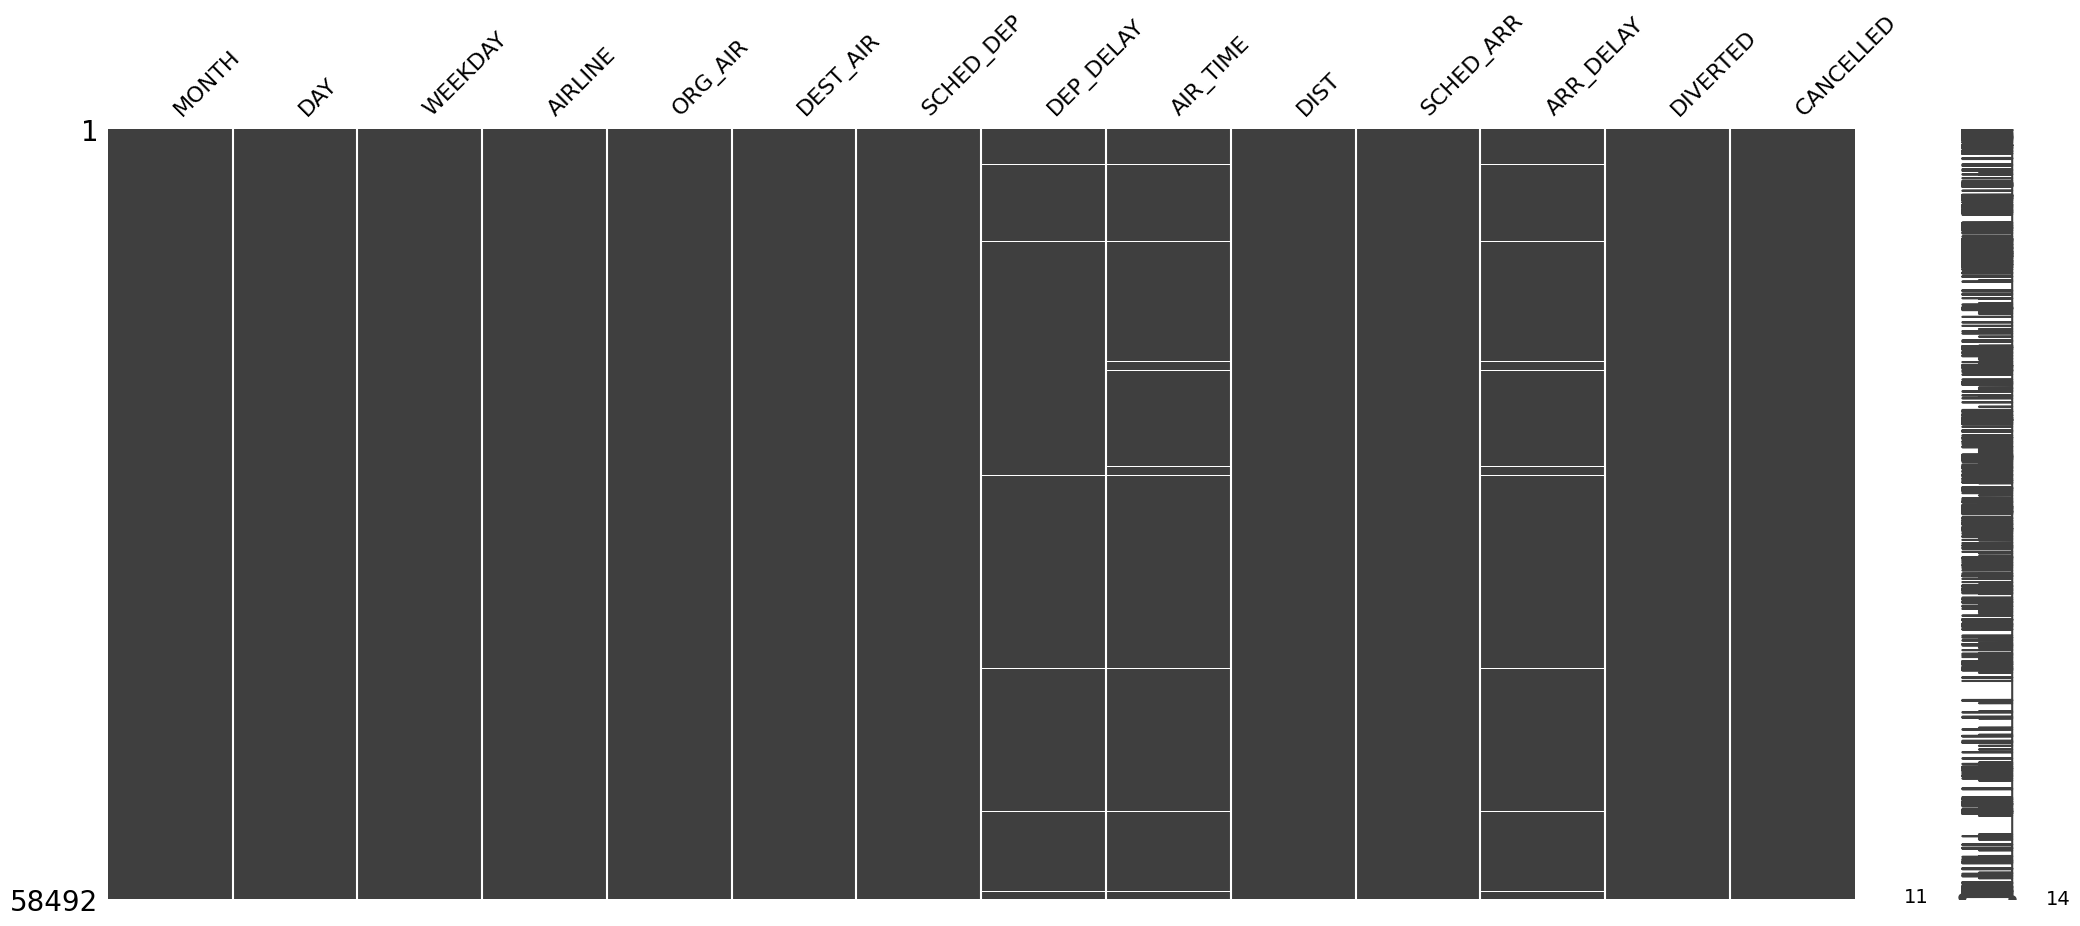

In [ ]:
# Grafico de los datos faltantes
missingno.matrix(flights)

In [ ]:
# Tarea : Arreglar/rellenar los valores faltantes de las 3 columnas :
  # DEP_DELAY
  # AIR_TIME
  # ARR_DELAY

print(flights[["DEP_DELAY", "AIR_TIME", "ARR_DELAY"]].dtypes)
# Conclusion : Todas las variables/columnas/features con valores faltantes (missing values)
# son datos de tipo punto flotante

DEP_DELAY    float64
AIR_TIME     float64
ARR_DELAY    float64
dtype: object


In [ ]:
# Valores faltantes : Expresemos esta informacion como porcentajes
flights.isnull().sum()*100/flights.shape[0]


MONTH        0.000000
DAY          0.000000
WEEKDAY      0.000000
AIRLINE      0.000000
ORG_AIR      0.000000
DEST_AIR     0.000000
SCHED_DEP    0.000000
DEP_DELAY    0.000000
AIR_TIME     1.740409
DIST         0.000000
SCHED_ARR    0.000000
ARR_DELAY    1.740409
DIVERTED     0.000000
CANCELLED    0.000000
dtype: float64

In [ ]:
# Rellenar valores nulos con un valor específico (IMPUTACION)
flights["DEP_DELAY"].fillna(flights.DEP_DELAY.mean(), inplace=True)

In [ ]:
# Eliminar filas con valores nulos (ELIMINACION)
flights.dropna(subset=["AIR_TIME"],inplace=True)

In [ ]:
flights.AIR_TIME.shape

(57474,)

# El metodo groupby

In [ ]:
# El metodo info
flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57474 entries, 0 to 58491
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      57474 non-null  int64  
 1   DAY        57474 non-null  int64  
 2   WEEKDAY    57474 non-null  int64  
 3   AIRLINE    57474 non-null  object 
 4   ORG_AIR    57474 non-null  object 
 5   DEST_AIR   57474 non-null  object 
 6   SCHED_DEP  57474 non-null  int64  
 7   DEP_DELAY  57474 non-null  float64
 8   AIR_TIME   57474 non-null  float64
 9   DIST       57474 non-null  int64  
 10  SCHED_ARR  57474 non-null  int64  
 11  ARR_DELAY  57474 non-null  float64
 12  DIVERTED   57474 non-null  int64  
 13  CANCELLED  57474 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 6.6+ MB


In [ ]:
# Agrupacion : Consideremos una variable cualitativa (object/category)
# Por ejemplo : AIRLINE

# Agregar : Consideremos una variable cuantitativa
# Por ejemplo : ARR_DELAY

# Funcion de agregacion : mean



In [ ]:
# Variable AIRLINE

# Numero de niveles de la variable AIRLINE
flights.AIRLINE.nunique()

14

In [ ]:
# Variable AIRLINE

# Moda
flights.AIRLINE.mode()[0]

'DL'

EJEMPLO DE USO DE GROUPBY CON OTRA BD
https://www.youtube.com/watch?v=2pf-sE0zma4

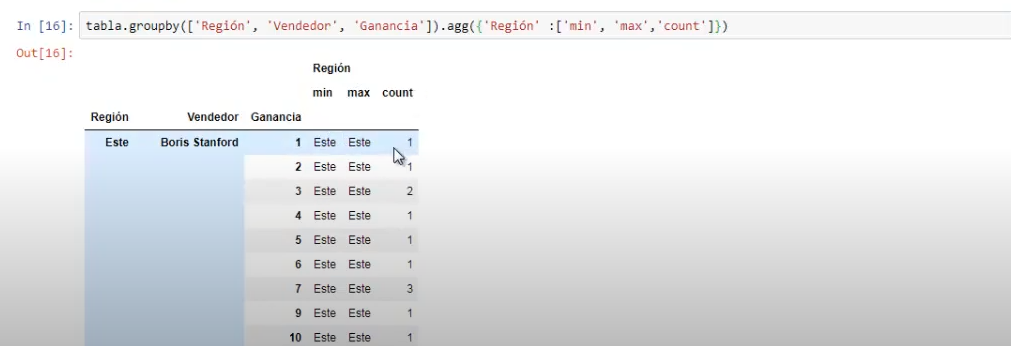

In [ ]:
raa = flights.groupby("AIRLINE").agg({"ARR_DELAY": ["mean","median","min","max"]})
raa

ARR_DELAY                     
              mean median   min     max
AIRLINE                                
AA        5.542661   -5.0 -60.0   858.0
AS       -0.833333   -6.0 -57.0   344.0
B6        8.692593   -2.0 -51.0   331.0
DL        0.339691   -7.0 -57.0   741.0
EV        7.034580   -3.0 -39.0   669.0
F9       13.630651   -1.0 -43.0   839.0
HA        4.972973    0.0 -44.0   298.0
MQ        6.860591   -4.0 -37.0   357.0
NK       18.436070    2.0 -39.0   474.0
OO        7.593463   -3.0 -44.0   724.0
UA        7.765755   -4.0 -58.0  1185.0
US        1.681105   -4.0 -51.0   431.0
VX        5.348884   -3.0 -51.0   236.0
WN        6.397353   -3.0 -52.0   493.0

In [ ]:
# Apliquemos groupby
MeanAirLine_ArrDelay = flights.groupby("AIRLINE").agg({"ARR_DELAY": "mean"})
MeanAirLine_ArrDelay

,ARR_DELAY
AIRLINE,
AA,5.542661
AS,-0.833333
B6,8.692593
DL,0.339691
EV,7.034580
F9,13.630651
HA,4.972973
MQ,6.860591
NK,18.436070


In [ ]:
MeanAirLine_ArrDelay.shape     #es un DataFrame

(14, 1)


Si en caso MeanAirLine_ArrDelay.shape arroja (14,) esto significa que MeanAirLine_ArrDelay es una Series de pandas, no un DataFrame.


In [ ]:
MeanAirLine_ArrDelay.sort_values(by = "ARR_DELAY")  #se usa el by porque (14, 1) es un DataFrame

,ARR_DELAY
AIRLINE,
AS,-0.833333
DL,0.339691
US,1.681105
HA,4.972973
VX,5.348884
AA,5.542661
WN,6.397353
MQ,6.860591
EV,7.034580


In [ ]:
# Otra forma : Obtener un dato de tipo Series
serial= flights.groupby("AIRLINE")["ARR_DELAY"].agg("mean")
serial

AIRLINE
AA     5.542661
AS    -0.833333
B6     8.692593
DL     0.339691
EV     7.034580
F9    13.630651
HA     4.972973
MQ     6.860591
NK    18.436070
OO     7.593463
UA     7.765755
US     1.681105
VX     5.348884
WN     6.397353
Name: ARR_DELAY, dtype: float64

In [ ]:
serial.shape

(14,)

In [ ]:
# Otra forma de alimentar el calculo hecho por la funcion de agrupacion
flights.groupby("AIRLINE").agg({"ARR_DELAY":np.mean})

<ipython-input-8-2a64bd3a01f4>:2: FutureWarning: The provided callable <function mean at 0x784ec0fdfd00> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  flights.groupby("AIRLINE").agg({"ARR_DELAY":np.mean})


,ARR_DELAY
AIRLINE,
AA,5.542661
AS,-0.833333
B6,8.692593
DL,0.339691
EV,7.034580
F9,13.630651
HA,4.972973
MQ,6.860591
NK,18.436070


In [ ]:
# La suma
flights.groupby("AIRLINE").agg({"ARR_DELAY":np.sum}).sort_values(by = "ARR_DELAY")

<ipython-input-13-21dd6879d266>:2: FutureWarning: The provided callable <function sum at 0x7dfdcc8a2dd0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  flights.groupby("AIRLINE").agg({"ARR_DELAY":np.sum}).sort_values(by = "ARR_DELAY")


,ARR_DELAY
AIRLINE,
AS,-640.0
HA,552.0
US,2678.0
DL,3580.0
B6,4694.0
VX,5274.0
F9,17788.0
MQ,22736.0
NK,27396.0


In [ ]:
# Obtengamos un objeto de timpo Series
flights.groupby("AIRLINE")["ARR_DELAY"].agg(np.max).sort_values()

<ipython-input-34-d3f34f256dc1>:2: FutureWarning: The provided callable <function max at 0x7e43e66f7400> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  flights.groupby("AIRLINE")["ARR_DELAY"].agg(np.max).sort_values()


AIRLINE
VX     236.0
HA     298.0
B6     331.0
AS     344.0
MQ     357.0
US     431.0
NK     474.0
WN     493.0
EV     669.0
OO     724.0
DL     741.0
F9     839.0
AA     858.0
UA    1185.0
Name: ARR_DELAY, dtype: float64

In [ ]:
# Observacion 1
grouped1 = flights.groupby("AIRLINE")


In [ ]:
type(grouped1)

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
# Lista de metodos
dir(grouped1)

['AIRLINE',
 'AIR_TIME',
 'ARR_DELAY',
 'CANCELLED',
 'DAY',
 'DEP_DELAY',
 'DEST_AIR',
 'DIST',
 'DIVERTED',
 'MONTH',
 'ORG_AIR',
 'SCHED_ARR',
 'SCHED_DEP',
 'WEEKDAY',
 '_DataFrameGroupBy__examples_dataframe_doc',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_agg_examples_doc',
 '_agg_general',
 '_agg_py_fallback',
 '_aggregate_frame',
 '_aggregate_with_numba',
 '_apply_filter',
 '_apply_to_column_groupbys',
 '_ascending_count',
 '_bool_agg',
 '_choose_path',
 '_concat_objects',
 '_constructor',
 '

In [ ]:
# Observacion2
# Una funcion de agregacion es basicamente una funcion que recibe muchos valores
# y devuelve un solo valor ("representante")

# Consideremos la funcion np.sqrt
flights.groupby("AIRLINE")["ARR_DELAY"].agg(np.sin)

ValueError: Must produce aggregated value

In [ ]:
# El numero de elementos por cada grupo
flights.groupby("AIRLINE").agg({"ARR_DELAY":"count"}).sort_values(by = "ARR_DELAY", ascending=True)

,ARR_DELAY
AIRLINE,
HA,111
B6,540
AS,768
VX,986
F9,1305
NK,1486
US,1593
MQ,3314
EV,5697


In [ ]:
# ORG_AIR : Aeropuertos de Origen
# AIR_TIME : Tiempo en el aire


# Calculemos el promedio  de tiempo de vuelo en funcion del aeropuerto de origen
flights.groupby("ORG_AIR").agg({"AIR_TIME": np.sum}).sort_values(by = "AIR_TIME")

<ipython-input-14-ccd9749b2ea5>:6: FutureWarning: The provided callable <function sum at 0x784ec0fdedd0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  flights.groupby("ORG_AIR").agg({"AIR_TIME": np.sum}).sort_values(by = "AIR_TIME")


,AIR_TIME
ORG_AIR,
MSP,381976.0
IAH,483351.0
LAS,508960.0
PHX,562179.0
SFO,637435.0
DEN,662817.0
DFW,747103.0
ORD,827236.0
LAX,911135.0


## Agrupar y agregar con multiples columnas de agregacion

In [ ]:
# Deseo encontrar/calcular el numero de vuelos cancelados (CANCELLED)
# para cada aerolinea por dia de la semana
grouped2 = flights.groupby(["AIRLINE", "WEEKDAY"]).agg({"CANCELLED":"sum"})
grouped2 #el cuadro que arroja python, de ese formato se guarda en excel

# El objeto grouped2 es lo que considera un MultiIndex

CANCELLED
AIRLINE WEEKDAY           
AA      1                0
        2                0
        3                0
        4                0
        5                0
...                    ...
WN      3                0
        4                0
        5                0
        6                0
        7                0

[98 rows x 1 columns]

In [ ]:
grouped2.to_excel("grouped2.xlsx")

In [ ]:
isinstance(grouped2,pd.DataFrame)

True

In [ ]:
isinstance(grouped2,pd.Series)

False

In [ ]:
grouped2.shape  #eso indica que es un DataFrime

(98, 1)

In [ ]:
# La mejor forma de obtener la informacionde grouped2 es reseteando los indices
grouped2 = grouped2.reset_index() #aumento de una columna a 3 columnas, facilita la busqueda
grouped2

,AIRLINE,WEEKDAY,CANCELLED
0,AA,1,0
1,AA,2,0
2,AA,3,0
3,AA,4,0
4,AA,5,0
...,...,...,...
93,WN,3,0
94,WN,4,0
95,WN,5,0
96,WN,6,0


In [ ]:
# Como se distribuyen los vuelos cancelados para al aerolinea "DL"
grouped2.loc[grouped2.AIRLINE == "DL", :]

,AIRLINE,WEEKDAY,CANCELLED
21,DL,1,10
22,DL,2,8
23,DL,3,8
24,DL,4,3
25,DL,5,3
26,DL,6,4
27,DL,7,2


In [ ]:
# Variables cualitativas para agrupar :
  # AIRLINE
  # WEEKDAY

# Variables cuantitativas para agregar
  # CANCELLED : Numero de vuelos cancelados
  # DIVERTED : Numero de vuelos desviados

# Deseo calcular el numero y el promedio de vuelos cancelados (CANCELLED) y vuelos desviados (DIVERTED)
# para cada aerolinea (AIRLINE) y por el dia de la semana  (WEEKDAY)

flights.groupby(["AIRLINE", "WEEKDAY"]).agg({"CANCELLED": "sum", "DIVERTED":"mean"})

CANCELLED  DIVERTED
AIRLINE WEEKDAY                     
AA      1               41  0.004699
        2                9  0.001631
        3               16  0.001494
        4               20  0.003751
        5               18  0.000786
...                    ...       ...
WN      3               18  0.001569
        4               10  0.003165
        5                7  0.000000
        6               10  0.003040
        7                7  0.002600

[98 rows x 2 columns]

In [ ]:
flights.groupby(["AIRLINE", "WEEKDAY"])[["CANCELLED", "DIVERTED"]].agg(["sum", "mean"])

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
...                   ...       ...      ...       ...
WN      3              18  0.014118        2  0.001569
        4              10  0.007911        4  0.003165
        5               7  0.005828        0  0.000000
        6              10  0.010132        3  0.003040
        7               7  0.006066        3  0.002600

[98 rows x 4 columns]

In [ ]:
# PAra cada aeropuerto de origen (ORG_AIR) y aeropuerto de destino (DEST_AIR)
# encontrar el numero total de vuelos, el numero y promedio de vuelos cancelados
# (CANCELLED). Asi como el promedio y varianza del tiempo en el aire (AIR_TIME)
flights.groupby(["ORG_AIR","DEST_AIR"]).agg({
    "CANCELLED":["sum","mean"],
    "AIR_TIME":["mean","var"]})

CANCELLED              AIR_TIME            
                       sum      mean        mean         var
ORG_AIR DEST_AIR                                            
ATL     ABE              0  0.000000   96.387097   45.778495
        ABQ              0  0.000000  170.500000   87.866667
        ABY              0  0.000000   28.578947    6.590643
        ACY              0  0.000000   91.333333   11.466667
        AEX              0  0.000000   78.725000   47.332692
...                    ...       ...         ...         ...
SFO     SNA              4  0.032787   64.059322   11.338331
        STL              0  0.000000  198.900000  101.042105
        SUN              0  0.000000   78.000000   25.777778
        TUS              0  0.000000  100.200000   35.221053
        XNA              0  0.000000  173.500000    0.500000

[1130 rows x 4 columns]

# Visualizacion

In [ ]:
# AIRLINE : Aerolineas
flights.loc[:, "AIRLINE"].nunique()

14

In [ ]:
xd1=flights.groupby("AIRLINE").agg({"AIRLINE": "count"})
xd1

,AIRLINE
AIRLINE,
AA,8720
AS,768
B6,540
DL,10539
EV,5697
F9,1305
HA,111
MQ,3314
NK,1486


In [ ]:
xd1.shape

(14, 1)

In [ ]:
xd2=flights.groupby("AIRLINE").agg({"AIRLINE": "count"})
# Renombrar la columna resultante
xd2 = xd2.rename(columns={"AIRLINE": "Count"})
xd2

,Count
AIRLINE,
AA,8720
AS,768
B6,540
DL,10539
EV,5697
F9,1305
HA,111
MQ,3314
NK,1486


In [ ]:
xd2.shape

(14, 1)

In [ ]:
xd3=xd2.reset_index()
xd3

,AIRLINE,Count
0,AA,8720
1,AS,768
2,B6,540
3,DL,10539
4,EV,5697
5,F9,1305
6,HA,111
7,MQ,3314
8,NK,1486
9,OO,6425


In [ ]:
xd3.shape

(14, 2)

In [ ]:
# Numero de vuelos por aerolinea
xd=flights.AIRLINE.value_counts()
xd

AIRLINE
DL    10539
AA     8720
WN     8310
UA     7680
OO     6425
EV     5697
MQ     3314
US     1593
NK     1486
F9     1305
VX      986
AS      768
B6      540
HA      111
Name: count, dtype: int64

In [ ]:
xd.shape #es un series

(14,)

In [ ]:
 #CONVERTIR UN DATAFRAME CON 1 COLUMNA
xd4=xd.to_frame()
xd4

,count
AIRLINE,
DL,10539
AA,8720
WN,8310
UA,7680
OO,6425
EV,5697
MQ,3314
US,1593
NK,1486


In [ ]:
xd4.shape

(14, 1)

In [ ]:
 #CONVERTIR UN DATAFRAME CON 2 COLUMNAS MAS
xd5=xd.reset_index()
xd5

,AIRLINE,count
0,DL,10539
1,AA,8720
2,WN,8310
3,UA,7680
4,OO,6425
5,EV,5697
6,MQ,3314
7,US,1593
8,NK,1486
9,F9,1305


In [ ]:
xd5.shape

(14, 2)

In [ ]:
# NUmero de vuelos por aerolinea como porcentaje
flights.AIRLINE.value_counts()*100/flights.shape[0]

,count
AIRLINE,
DL,18.123846
AA,15.215756
WN,14.391712
UA,13.321480
OO,11.263079
EV,10.015045
MQ,5.934145
US,2.761061
NK,2.591807


GRAFICOS DE SERIES

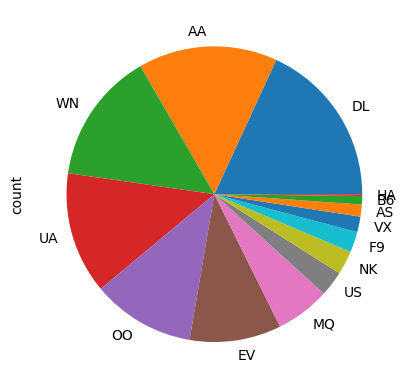

In [ ]:
flights["AIRLINE"].value_counts().plot(kind = "pie")
plt.show()

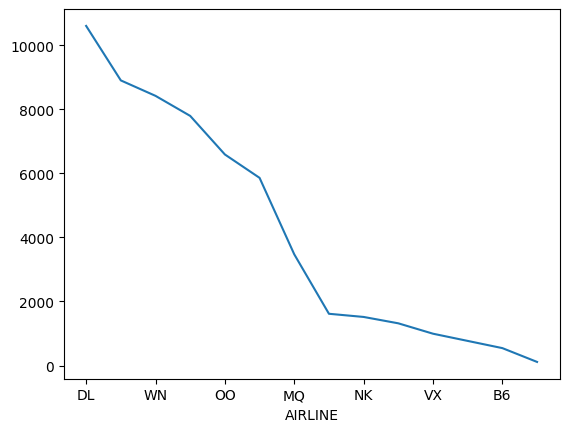

In [ ]:
flights["AIRLINE"].value_counts().plot(kind = "line")
plt.show()

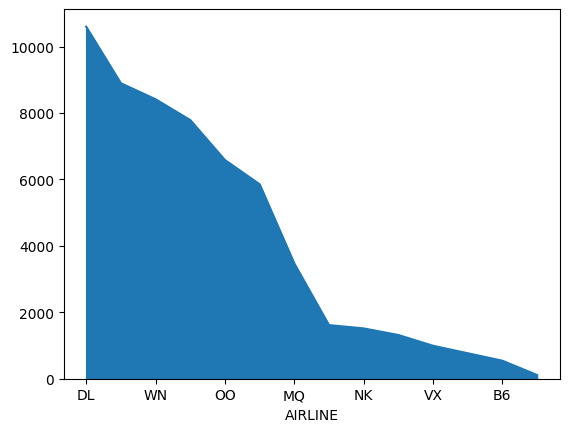

In [ ]:
flights["AIRLINE"].value_counts().plot(kind = "area")
plt.show()

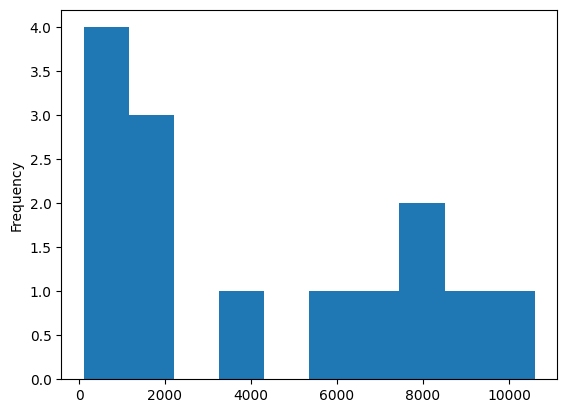

In [ ]:
flights["AIRLINE"].value_counts().plot(kind = "hist")
plt.show()

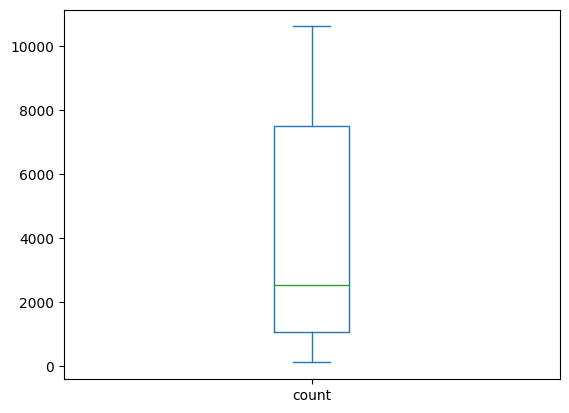

In [ ]:
flights["AIRLINE"].value_counts().plot(kind = "box")
plt.show()

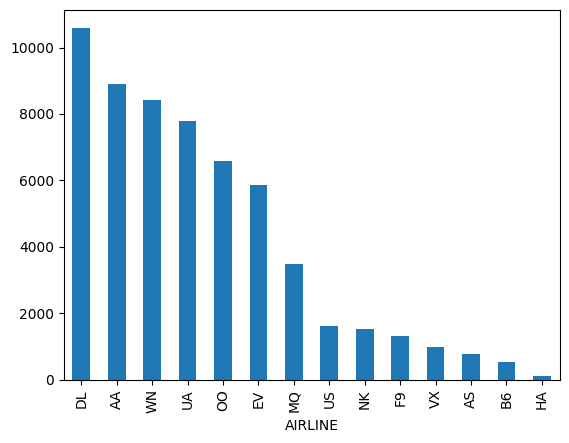

In [ ]:
# Dada la informacion obtenida mediante el metodo value_counts , podemos mostrar
# esta informacion usando un diagrama de barras
flights["AIRLINE"].value_counts().plot(kind = "bar")
plt.show()

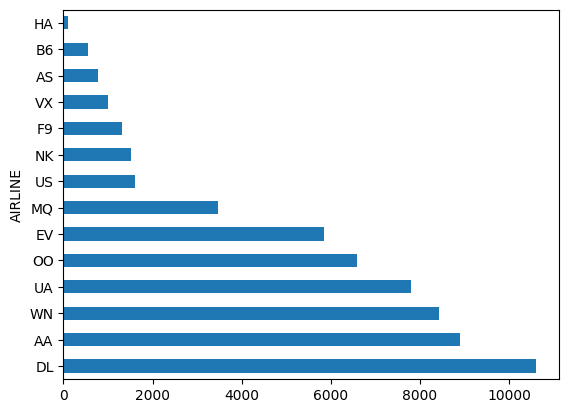

In [ ]:
# Mejora 1
# Eliminemos <Axes: ylabel='AIRLINE'>
flights["AIRLINE"].value_counts().plot(kind = "barh")
plt.show()

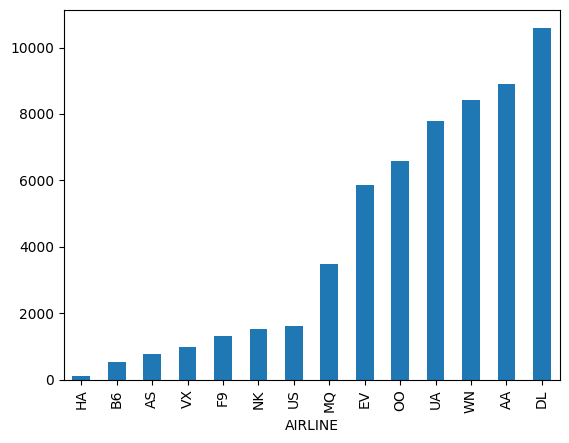

In [ ]:
# Modifiquemos el grafico anterior mostrando la barras en orden acendente
flights["AIRLINE"].value_counts().sort_values(ascending= True).plot(kind = "bar")
plt.show()

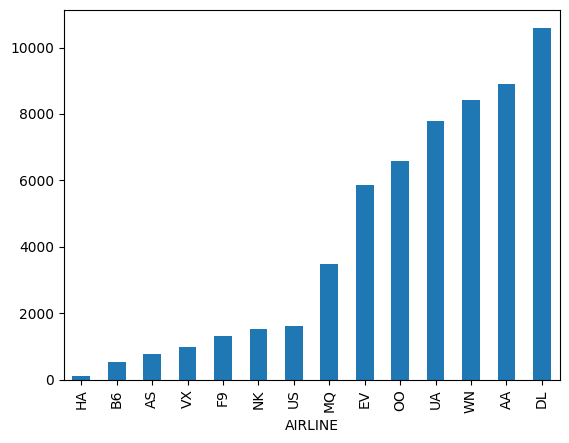

In [ ]:
flights["AIRLINE"].value_counts(ascending= True).plot(kind = "bar")
plt.show()

<Axes: ylabel='AIRLINE'>

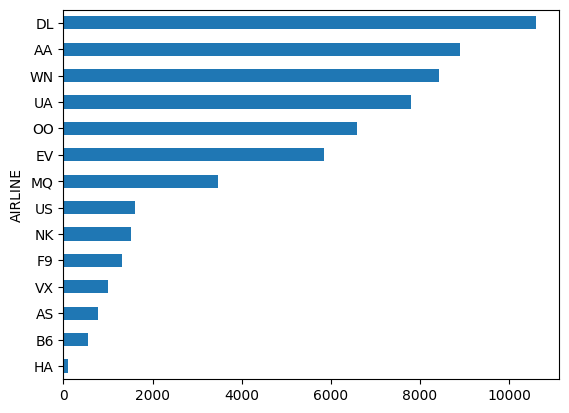

In [ ]:
# MOdifiquemos el grafico anterior : usando barras horizontales
flights["AIRLINE"].value_counts(ascending= True).plot(kind = "barh")

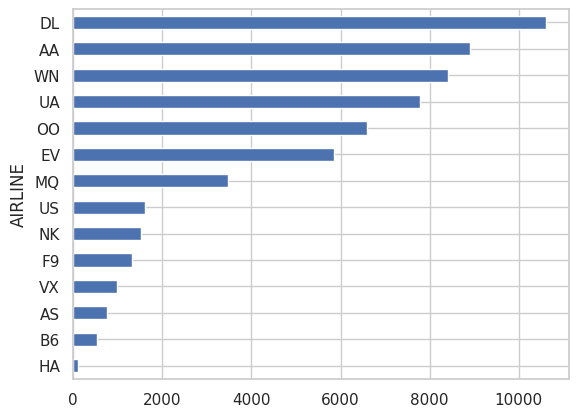

In [ ]:
# Mejora 1
# Eliminemos <Axes: ylabel='AIRLINE'>
flights["AIRLINE"].value_counts(ascending= True).plot(kind = "barh")
plt.show()

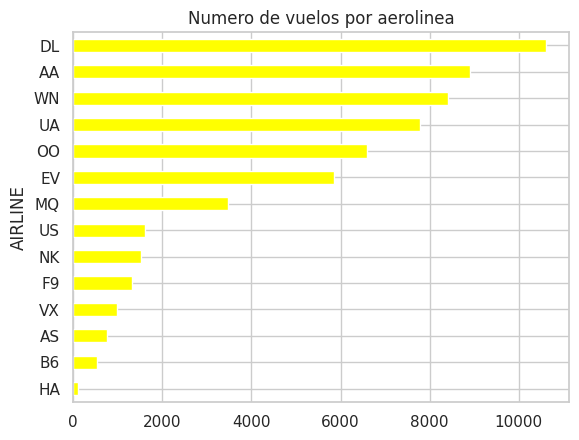

In [ ]:
# Mejora2
# Agreguemos un titulo a nuestro grafico anterior
flights["AIRLINE"].value_counts(ascending= True).plot(
kind = "barh",
title = "Numero de vuelos por aerolinea",
color = "yellow")
plt.show()

plt.subplots(): Esta función crea una figura y un conjunto de subgráficos (ejes). Es una forma conveniente de crear una figura con uno o más subgráficos.


fig, ax:


fig es una variable que almacena la figura creada. La figura es el contenedor global para todo lo que se va a dibujar.

ax es una variable que almacena el conjunto de ejes (subgráficos) creado dentro de la figura. Los ejes son el área de la figura donde se traza el
gráfico.

figsize=(6,6): Este parámetro opcional especifica el tamaño de la figura en pulgadas. En este caso, la figura tendrá un ancho de 6 pulgadas y una altura de 6 pulgadas.

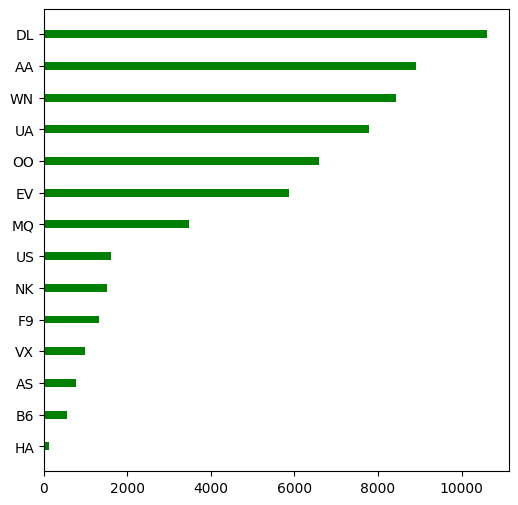

In [ ]:
#  Forma mas personalizable de mostrar nuestro diagrama de barras
  # Definir un objeto para la ventana/figura : fig
  # Definir un objeto para manipular los ejes : ax
fig, ax = plt.subplots(figsize = (6,6)) #esta en pulgadas

# Definamos los argumentos de mi diagrama de barras
x = flights.AIRLINE.value_counts(ascending=True).index.values
y = flights.AIRLINE.value_counts(ascending=True).values

# En el objeto ax deseo colocar el diagrama de barras
ax.barh(x,y,height= 0.25,    # es como ax.barh((vertical),(horizontal),height=0.25,
        color = "green")     #                 color="green")

# Siempre la ultima de un grafico es :
plt.show()

In [ ]:
y = flights.AIRLINE.value_counts(ascending=True).values
y

array([  112,   543,   768,   993,  1317,  1516,  1615,  3471,  5858,
        6588,  7792,  8418,  8900, 10601])

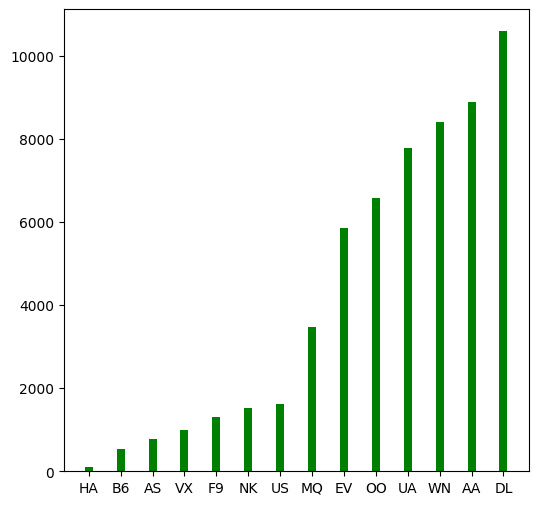

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))

# Definamos los argumentos de mi diagrama de barras
x = flights.AIRLINE.value_counts(ascending=True).index.values #VALOR DE LOS INDICES
#array(['HA', 'B6', 'AS', 'VX', 'F9', 'NK', 'US', 'MQ', 'EV', 'OO', 'UA', 'WN', 'AA', 'DL']
y = flights.AIRLINE.value_counts(ascending=True).values #valores del y

# En el objeto ax deseo colocar el diagrama de barras
ax.bar(x,y,width= 0.25, #ancho      # es como ax.bar((horizontal),(vertical),height=0.25,
        color = "green")                               #                 color="green)
               #en el bar,si el orden es x,y,hei...., --x vendria ser el lado horizontal mientras que y el lado vertical

# Siempre la ultima de un grafico es :
plt.show()

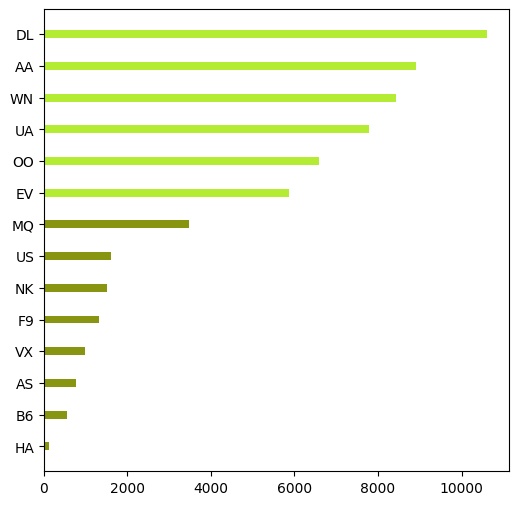

In [ ]:
# Mejoremos el grafico anterior :
  # Regla de construccion de los colores :
    # > 5000 de color verde
    # <= 5000 de color amarillo

# Necesitamos construir una lista de colores
ListaColores = []
for valor in flights.AIRLINE.value_counts(ascending=True).values:
  if valor >5000 :
    ListaColores.append("#B3EC32") #htmlcolorcodes
  else:
    ListaColores.append("#879511")

fig, ax = plt.subplots(figsize = (6,6))

# Definamos los argumentos de mi diagrama de barras
x = flights.AIRLINE.value_counts(ascending=True).index.values
y = flights.AIRLINE.value_counts(ascending=True)

# En el objeto ax deseo colocar el diagrama de barras
ax.barh(x,y,height= 0.25,            #en el barh, si el orden es x,y,hei.... --x vendria ser el lado vertical mientras que y el lado horizontal
        color = ListaColores)

# Siempre la ultima de un grafico es :
plt.show()



<ipython-input-8-2364441a32c1>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45,


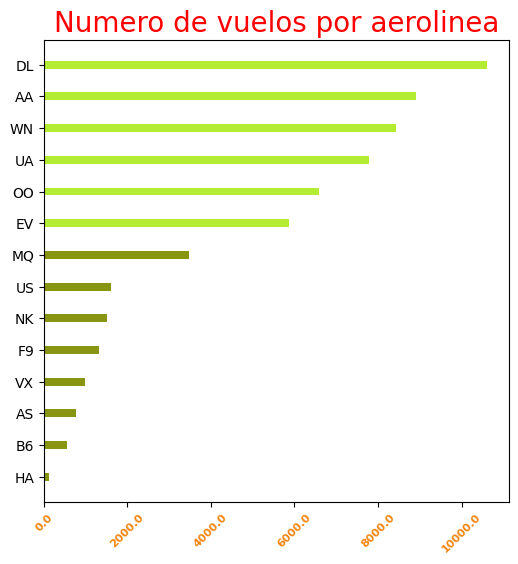

In [ ]:
# Otra mejora a nuestro grafico anterior : Coloquemos  un titulo


fig, ax = plt.subplots(figsize = (6,6))

# Definamos los argumentos de mi diagrama de barras
y = flights.AIRLINE.value_counts(ascending=True).index.values
x = flights.AIRLINE.value_counts(ascending=True)

# En el objeto ax deseo colocar el diagrama de barras
ax.barh(y,x,height= 0.25,        #en el barh, si el orden es y,x,hei.... --y vendria ser el lado vertical mientras que x el lado horizontal
        color = ListaColores)

# El titulo se encuentra el el eje : ax
ax.set_title("Numero de vuelos por aerolinea",
             {"fontsize": 20},     #Tamaño de la fuente
              color = "red",       #color de la fuente
              loc = "center")       #Locacion(hacia la derecha) pero existe 'left', 'center'

# Modifiquemos los ticks (eje-X : xticks / eje-Y : yticks)
ax.xaxis.set_tick_params(labelsize = 8                  #Tamaño de la etiqueta         #xaxis se refiere al horizontal en si del barh
                         , labelcolor = "#F38510")      #color de la etiqueta
ax.yaxis.set_tick_params(labelsize = 10)                                               #yaxis se refiere al vertical en si del barh

# Rotemos los xticks
ax.set_xticklabels(ax.get_xticks(), rotation = 45,
                   weight = "bold")                   #peso de la etiqueta = "negrita"

# Siempre la ultima de un grafico es :
plt.show()

In [ ]:
for x_val,y_val in enumerate(y):
  print(x_val,y_val)

0 HA
1 B6
2 AS
3 VX
4 F9
5 NK
6 US
7 MQ
8 EV
9 OO
10 UA
11 WN
12 AA
13 DL


In [ ]:
for x_val,y_val in enumerate(x):
  print(x_val,y_val)

0 112
1 543
2 768
3 993
4 1317
5 1516
6 1615
7 3471
8 5858
9 6588
10 7792
11 8418
12 8900
13 10601


<ipython-input-49-e239d1214a35>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45,


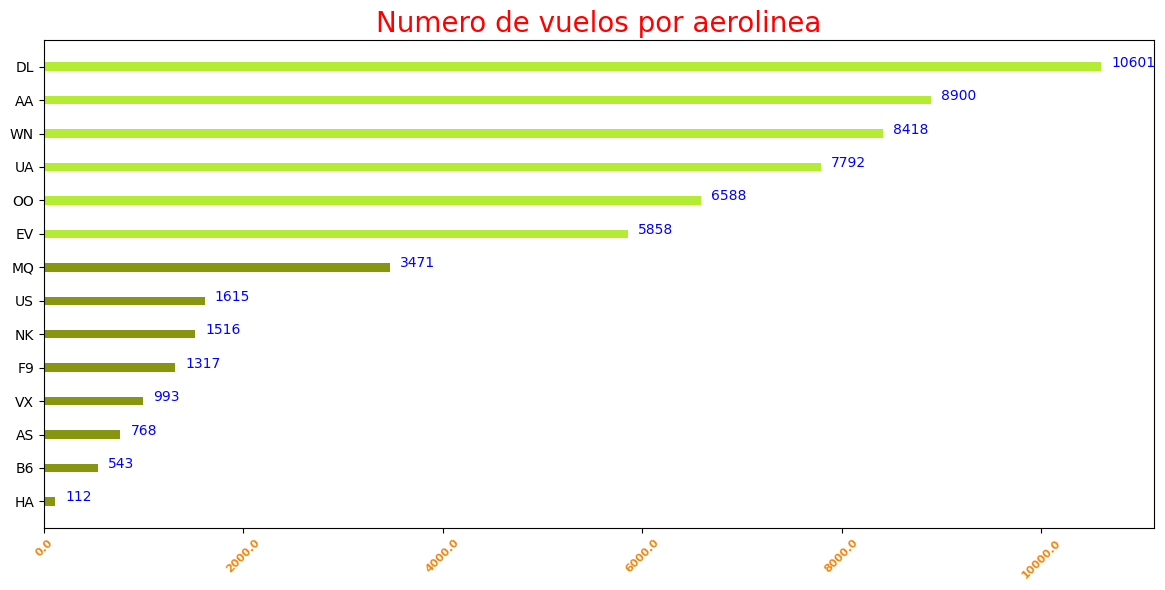

In [ ]:
# Al grafico anterior agreguemos el numero de vuelos en cada barrita


fig, ax = plt.subplots(figsize = (6,6))

# Definamos los argumentos de mi diagrama de barras
x = flights.AIRLINE.value_counts(ascending=True).index.values
y = flights.AIRLINE.value_counts(ascending=True)

# En el objeto ax deseo colocar el diagrama de barras
ax.barh(x,y,height= 0.25,
        color = ListaColores)

# El titulo se encuentra el el eje : ax
ax.set_title("Numero de vuelos por aerolinea",
             {"fontsize": 20},
              color = "red",
              loc = "center")

# Modifiquemos los ticks (eje-X : xticks / eje-Y : yticks)
ax.xaxis.set_tick_params(labelsize = 8, labelcolor = "#F38510")
ax.yaxis.set_tick_params(labelsize = 10)

# Rotemos los xticks
ax.set_xticklabels(ax.get_xticks(), rotation = 45,
                   weight = "bold")

# Coloquemos el numero de vuelos por aerolinea
for i, v in enumerate(y):
  ax.text(v+100, i , v , color = "blue")
#
plt.tight_layout(rect = (0,0,2,1))


# Siempre la ultima de un grafico es :
plt.show()

**ax.text(v + 10, i, v, color="blue"):**

**ax.text():**Esta función se usa para agregar texto en una posición específica dentro del gráfico.

**Primer argumento (v + 10)**: La posición horizontal (x) del texto. v es la longitud de la barra, y v + 10 coloca el texto un poco más a la derecha de la barra para que no se superponga.

**Segundo argumento (i)**: La posición vertical (y) del texto. i corresponde al índice en el que se encuentra el valor dentro de y, lo que alinea el texto con la barra correcta.

**Tercer argumento (v)**: El texto que se va a mostrar. En este caso, el número de vuelos.

**color="blue"**: Color del texto.

___________________________________________________________________________

**plt.tight_layout():**


Esta función ajusta automáticamente los parámetros de subplots para que el contenido del gráfico (como etiquetas, títulos, y barras) no se sobreponga y se ajuste bien dentro de la figura.

**Argumento rect:**

El argumento rect es una tupla de 4 valores (left, bottom, right, top) que especifica el área de la figura donde se deben ajustar los subplots.

*left=0:* La coordenada del borde izquierdo de la figura (0 significa el borde izquierdo).

*bottom=0:* La coordenada del borde inferior de la figura (0 significa el borde inferior).

*right=2:* La coordenada del borde derecho de la figura (2 significa que el borde derecho se extiende más allá del borde derecho original, permitiendo más espacio).

*top=1:* La coordenada del borde superior de la figura (1 significa el borde superior).

El valor de rect se usa para ajustar el área visible del gráfico, y en este caso específico, rect=(0,0,2,1) expande el área del gráfico en el lado derecho para proporcionar más espacio a las etiquetas de texto.

Resumen: plt.tight_layout(rect=(0,0,2,1)) asegura que el contenido del gráfico se ajuste adecuadamente y no se solapen los elementos, extendiendo el área visible en el lado derecho si es necesario.

# Mostremos otra informacion

In [ ]:

# Deseo calcular el numero y el promedio de vuelos cancelados (CANCELLED) y vuelos desviados (DIVERTED)
# para cada aerolinea (AIRLINE) y por el dia de la semana  (WEEKDAY)

data1 = flights.groupby(["AIRLINE", "WEEKDAY"]).agg({"CANCELLED": "sum", "DIVERTED":"mean"}).reset_index()
data1

,AIRLINE,WEEKDAY,CANCELLED,DIVERTED
0,AA,1,41,0.004699
1,AA,2,9,0.001631
2,AA,3,16,0.001494
3,AA,4,20,0.003751
4,AA,5,18,0.000786
...,...,...,...,...
93,WN,3,18,0.001569
94,WN,4,10,0.003165
95,WN,5,7,0.000000
96,WN,6,10,0.003040


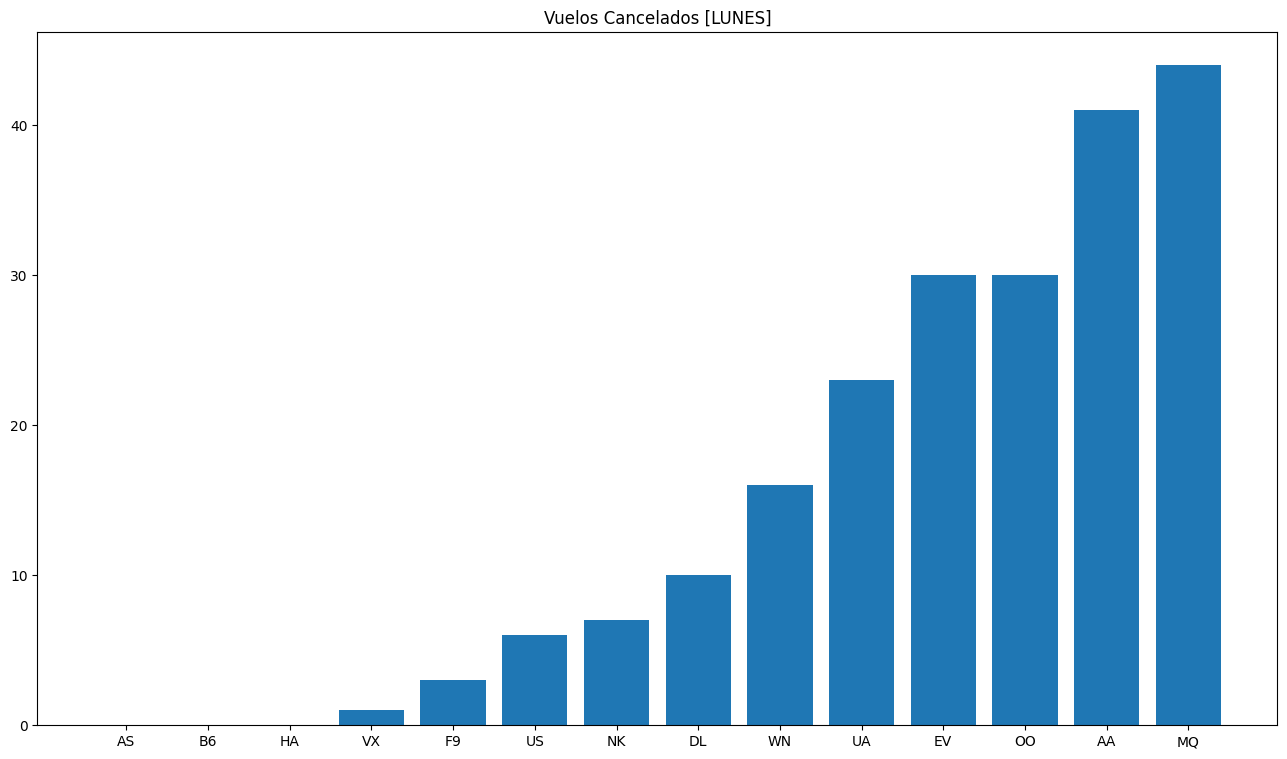

In [ ]:
# Que ocurre los lunes con respecto a los vuelos cancelados para todas als aerolineas
#PERSONALIZACION CON DATAFRAME

Lunes = data1.loc[data1.WEEKDAY ==1 , ["AIRLINE", "CANCELLED"]].sort_values(by = "CANCELLED")


x = Lunes["CANCELLED"]
y = Lunes["AIRLINE"]

fig, ax = plt.subplots(figsize = (16,9))
ax.bar(y,x)
ax.set_title("Vuelos Cancelados [LUNES]")

# Guardemos el grafico en disco duro
plt.savefig("Lunes_Cancelados.png")

plt.show()



In [ ]:

# Diccionario para los dias de la semana
DiasSemana = {1:"Lunes",
              2:"Martes",
              3:"Miercoles",
              4:"Jueves",
              5:"Viernes",
              6:"Sabado",
              7:"Domingo"}


# Desactivamos la interactividad de pyplot
plt.ioff()
for i in range(1,8):
  diaSemana = data1.loc[data1.WEEKDAY ==i , ["AIRLINE", "CANCELLED"]].sort_values(by = "CANCELLED")
  x = diaSemana["CANCELLED"]
  y = diaSemana["AIRLINE"]

  fig, ax = plt.subplots(figsize = (16,9))
  ax.bar(y,x)

  titulo = "Vuelos Cancelados ["+DiasSemana[i]+"]"
  ax.set_title(titulo)

  # Guardemos el grafico en disco duro
  ArchivoDiscoDuro = "Vuelos_Cancelados_[Dia" + str(i)+"].png"
  plt.savefig(ArchivoDiscoDuro)

  # plt.show()

# Activamos la interactividad de pyplot
plt.ion()


NameError: name 'plt' is not defined